<a href="https://colab.research.google.com/github/digimonksolutions/Text2ArtAI/blob/main/StableDiffusionImageGeneration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Change the runtime type to a available GPU**

In [ ]:
!pip install diffusers --upgrade
!pip3 install invisible_watermark transformers accelerate safetensors

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 15.0 MB/s eta 0:00:00


In [ ]:
!pip install flask
!pip install pyngrok

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.8/731.8 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.1-py3-none-any.whl size=21122 sha256=ab679e26fbf85d44870a90f86709020ea326df82856550943ca0ffa023dc6f1d
  Stored in directory: /root/.cache/pip/wheels/3b/32/0e/27789b6fde02bf2b320d6f1a0fd9e1354b257c5f75eefc29bc
Successfully built pyngrok


In [ ]:
import torch
import base64
from io import BytesIO
from typing import Tuple
print(torch.__version__)

2.1.0+cu118


In [ ]:
style_list = [
    {
        "name": "(No style)",
        "prompt": "{prompt}",
        "negative_prompt": "ugly, deformed, noisy, blurry, low contrast, disfigured,low poly, low quality, bad quality",
    },
    {
        "name": "Cinematic",
        "prompt": "cinematic still {prompt} . emotional, harmonious, vignette, highly detailed, high budget, bokeh, cinemascope, moody, epic, gorgeous, film grain, grainy",
        "negative_prompt": "anime, cartoon, graphic, text, painting, crayon, graphite, abstract, glitch, deformed, mutated, ugly, disfigured",
    },
    {
        "name": "Photographic",
        "prompt": "cinematic photo {prompt} . 35mm photograph, film, bokeh, professional, 4k, highly detailed",
        "negative_prompt": "drawing, painting, crayon, sketch, graphite, impressionist, noisy, blurry, soft, deformed, ugly",
    },
    {
        "name": "Anime",
        "prompt": "anime artwork {prompt} . anime style, key visual, vibrant, studio anime,  highly detailed",
        "negative_prompt": "photo, deformed, black and white, realism, disfigured, low contrast",
    },
    {
        "name": "Manga",
        "prompt": "manga style {prompt} . vibrant, high-energy, detailed, iconic, Japanese comic style",
        "negative_prompt": "ugly, deformed, noisy, blurry, low contrast, realism, photorealistic, Western comic style",
    },
    {
        "name": "Digital Art",
        "prompt": "concept art {prompt} . digital artwork, illustrative, painterly, matte painting, highly detailed",
        "negative_prompt": "photo, photorealistic, realism, ugly",
    },
    {
        "name": "Pixel art",
        "prompt": "pixel-art {prompt} . low-res, blocky, pixel art style, 8-bit graphics",
        "negative_prompt": "sloppy, messy, blurry, noisy, highly detailed, ultra textured, photo, realistic",
    },
    {
        "name": "Fantasy art",
        "prompt": "ethereal fantasy concept art of  {prompt} . magnificent, celestial, ethereal, painterly, epic, majestic, magical, fantasy art, cover art, dreamy",
        "negative_prompt": "photographic, realistic, realism, 35mm film, dslr, cropped, frame, text, deformed, glitch, noise, noisy, off-center, deformed, cross-eyed, closed eyes, bad anatomy, ugly, disfigured, sloppy, duplicate, mutated, black and white",
    },
    {
        "name": "Neonpunk",
        "prompt": "neonpunk style {prompt} . cyberpunk, vaporwave, neon, vibes, vibrant, stunningly beautiful, crisp, detailed, sleek, ultramodern, magenta highlights, dark purple shadows, high contrast, cinematic, ultra detailed, intricate, professional",
        "negative_prompt": "painting, drawing, illustration, glitch, deformed, mutated, cross-eyed, ugly, disfigured",
    },
    {
        "name": "3D Model",
        "prompt": "professional 3d model {prompt} . octane render, highly detailed, volumetric, dramatic lighting",
        "negative_prompt": "ugly, deformed, noisy, low poly, blurry, painting",
    },
]

styles = {k["name"]: (k["prompt"], k["negative_prompt"]) for k in style_list}
STYLE_NAMES = list(styles.keys())
DEFAULT_STYLE_NAME = "(No style)"

def apply_style(style_name: str, positive: str, negative: str = "") -> Tuple[str, str]:
    p, n = styles.get(style_name, styles[DEFAULT_STYLE_NAME])
    return p.replace("{prompt}", positive), n + negative

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

model_index.json:   0%|          | 0.00/609 [00:00<?, ?B/s]

Fetching 19 files:   0%|          | 0/19 [00:00<?, ?it/s]

text_encoder_2/config.json:   0%|          | 0.00/575 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/565 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/479 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/642 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionXLPipeline {
  "_class_name": "StableDiffusionXLPipeline",
  "_diffusers_version": "0.23.1",
  "_name_or_path": "stabilityai/stable-diffusion-xl-base-1.0",
  "force_zeros_for_empty_prompt": true,
  "scheduler": [
    "diffusers",
    "EulerDiscreteScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "text_encoder_2": [
    "transformers",
    "CLIPTextModelWithProjection"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "tokenizer_2": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

  0%|          | 0/25 [00:00<?, ?it/s]

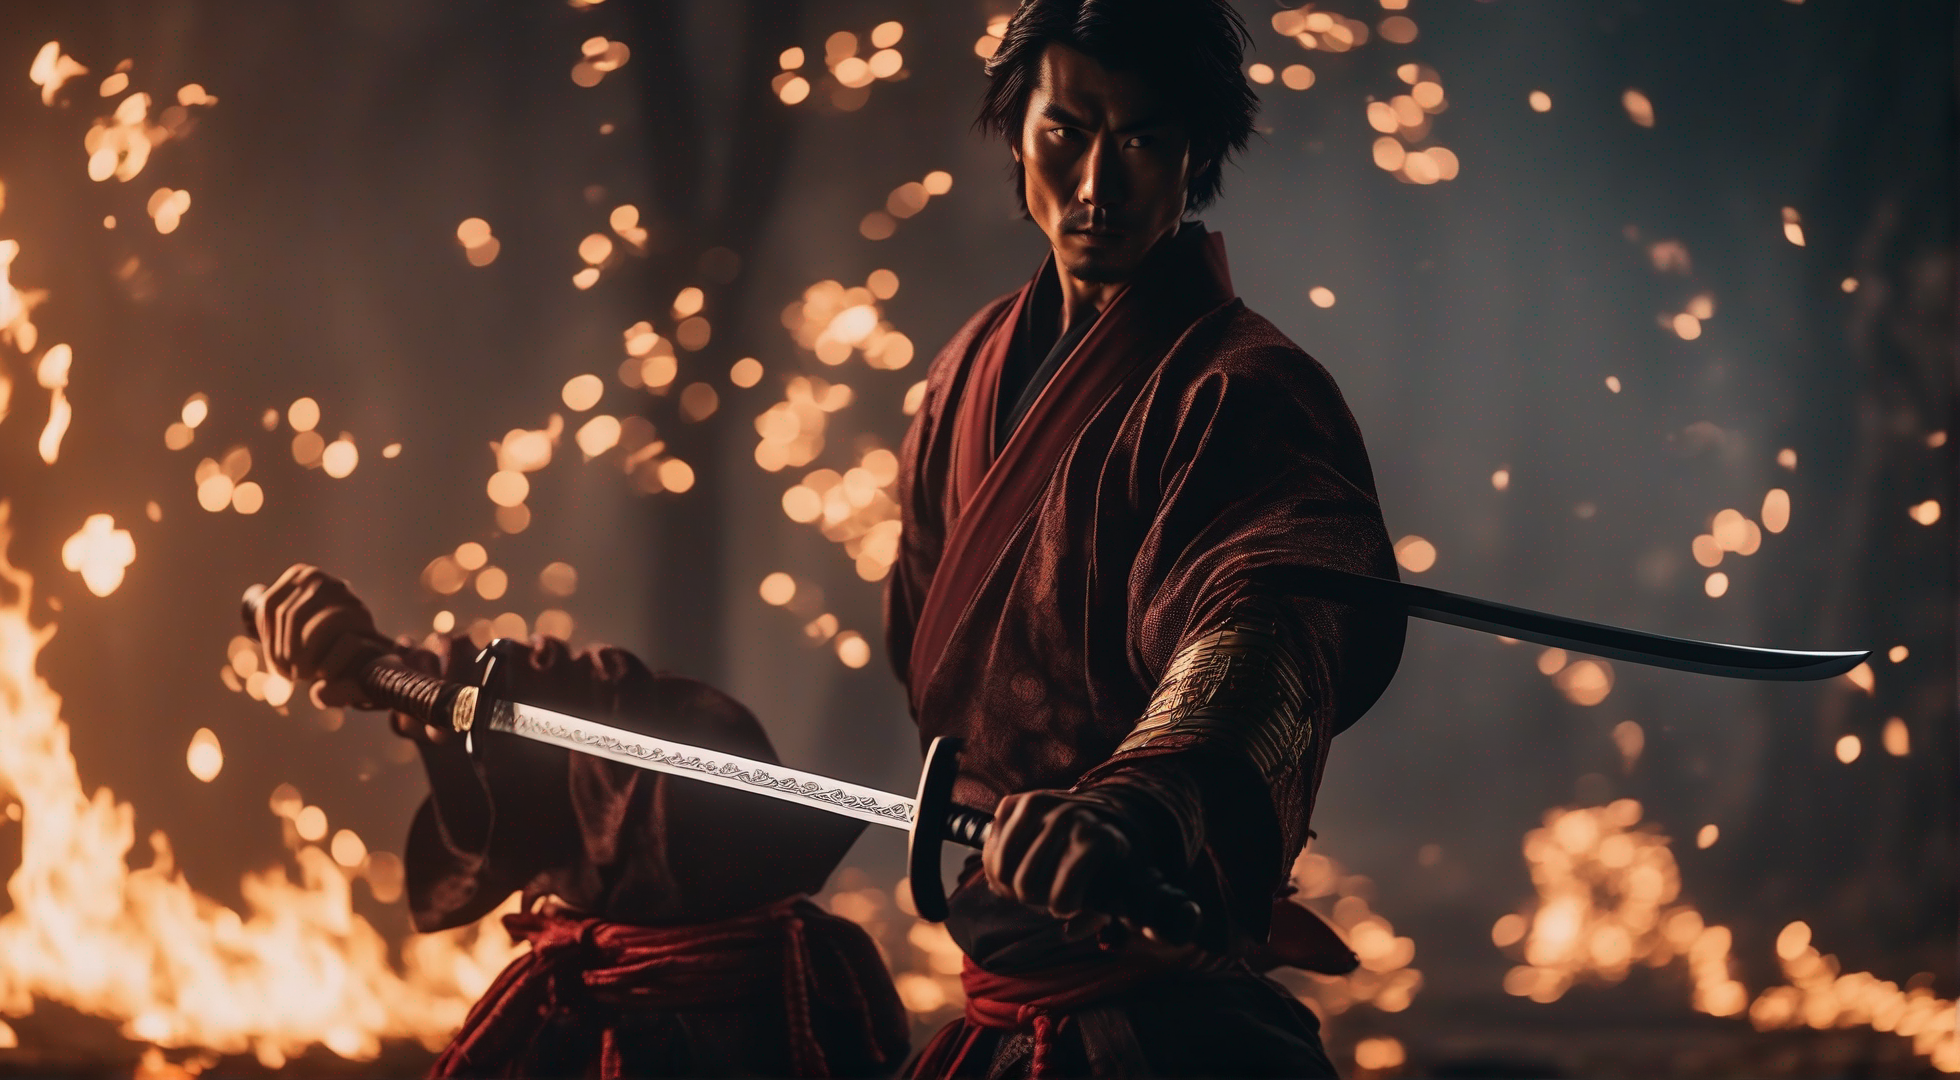

In [ ]:
 test = pipe(
          prompt="cinematic photo of a samurai holding a flaming katana . 35mm photograph, film, bokeh, professional, 4k, highly detailed",
          negative_prompt = "drawing, painting, crayon, sketch, graphite, impressionist, noisy, blurry, soft, deformed, ugly",
          guidance_scale=7.5,
          num_inference_steps = 25,
          height = 1024,
          width = 1024
          ).images[0]
display(test)

In [ ]:
def generate_image(prompt, negative_prompt, style):
    try:
      prompt, negative = apply_style(style, prompt, negative_prompt)
      images = pipe(
          prompt=prompt,
          negative_prompt=negative_prompt,
          guidance_scale=7,
          num_inference_steps = 30
          ).images[0]
      im_file = BytesIO()
      images.save(im_file, format="JPEG")
      im_bytes = im_file.getvalue()  # im_bytes: image in binary format.
      im_b64 = base64.b64encode(im_bytes)

      return str(im_b64.decode("utf-8"))
    except Exception as e:
      return str(e)


In [ ]:
import os
import threading

from flask import Flask,request,jsonify
from pyngrok import ngrok

app = Flask(__name__)
port = "5000"

# Open a ngrok tunnel to the HTTP server
ngrok.set_auth_token("2XLDPihaiM9PA6zecGwlHpevpsF_5i1VAvjab7NbRk8E4ksNW")

public_url = ngrok.connect(
    # session configuration
    addr = port,
    domain="trusty-ape-easy.ngrok-free.app").public_url
print(" * ngrok tunnel \"{}\" -> \"http://127.0.0.1:{}\"".format(public_url, port))

# Update any base URLs to use the public ngrok URL
app.config["BASE_URL"] = public_url
app.config['ENV'] = 'development'
app.config['DEBUG'] = True

# ... Update inbound traffic via APIs to use the public-facing ngrok URL


# Define Flask routes
@app.route('/generate_image', methods=['POST'])
def create_image():
    try:
        data = request.get_json()
        prompt = data.get('prompt', '')
        negative_prompt = data.get('negative_prompt', '')
        style = data.get('style', '')

        if not prompt or not negative_prompt or not style:
            return jsonify({'error': 'Missing required parameters'}), 400

        image_base64 = generate_image(prompt, negative_prompt, style)
        return jsonify({'image': image_base64})
    except Exception as e:
        return jsonify({'error': str(e)}), 500

# Start the Flask server in a new thread
threading.Thread(target=app.run, kwargs={"use_reloader": False}).start()

 * ngrok tunnel "https://trusty-ape-easy.ngrok-free.app" -> "http://127.0.0.1:5000"
